# Lab 11: Multilayer perceptron classification using *scikit-learn*


### Add your name to the markdown cell below <span style = 'font-size:80%'>[2 points]</span>

### Name: Juan Villegas

## Using a perceptron to for classification of a small example dataset

A small, made up dataset is provided below, and is composed of the following:

- *X*: the feature matrix consisting of 100 values for one variable
- *y*: the target values, consisting of either 0 or 1

Note that you do not need to understand the code; only that the code creates the feature matrix *X* and the target values *y*.

In [6]:
import numpy as np

# Generate X values from 1 - 100
X = np.arange(1,101)

# Generate corresponding target values which are to 1 if the feature > 50; or 0 otherwise
l = [int(x > 50) for x in X]
y = np.array(l)

# X must be 2-dimensional for scikit learn, so reshape the data
X = X.reshape((100, 1))

### Question 1 <span style = 'font-size:80%'>[5 points]</span>

Use the seaborn module to generate a scatterplot that plots the first column of X on the x-axis and the number 0 on the y-axis (the second argument should simply be 0), and color the points by *y* value. The plot should look like the plot below (but don't worry if you are unable to set the x- and y-axis labels):

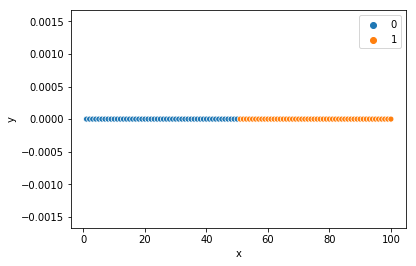

In [7]:
import seaborn as sns

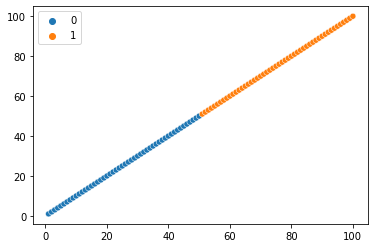

In [8]:
plot = sns.scatterplot(y = X[:,0], x = X[:,0], hue = y)

The code below fits a *Perceptron* classifier to the data. As covered in class, a perceptron consist of an input layer, a single neuron, and an output layer. The single neuron fires if the sum of weighted inputs is greater than the bias term.

In [9]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5000, random_state = 1, tol = 1e-10)
perceptron.fit(X,y)

Perceptron(max_iter=5000, random_state=1, tol=1e-10)

### Question 2 <span style = 'font-size:80%'>[6 points]</span>

Show that the perceptron fits the training data with 100% accuracy, by creating a heatmap showing the confusion matrix for predictions on the training data.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

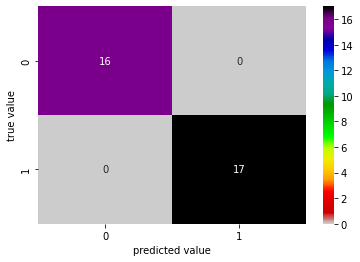

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r', fmt='.3g')
s.set_ylabel('true value')
s.set_xlabel('predicted value')
None 

### Question 3 <span style = 'font-size:80%'>[5 points]</span>

The weight and bias term for the neuron are displayed below. Based on the weight and bias term, when does the neuron fire? Answer in the markdown cell below. Given the graph of the data from Question 1 (and using a little bit of algebra), does this make sense? Why or why not?

(Note: the intercept has the opposite sign of the bias term that we discussed in class; hence we output *-perceptron.intercept_[0]*; this output is the *bias*)

In [34]:
print('The weight for the first layer is:', perceptron.coef_[0][0])
print('The bias for the first layer is: ', -perceptron.intercept_[0])

The weight for the first layer is: 5.0
The bias for the first layer is:  251.0


Answer:

Since the Bias is 251, this means that any # multiplied by 5 (the weight) that is equal to or greater than the bias, will fire. 

In the scatterplot, it looks like neurons start to fire when the number hits 50. However, After knowing that the bias is 251. We know that nuerons fire after 50 (51 and up). 

Y = 5(51) = 255 > 251 == Fires

Y= 5(50) = 250 < 251 == Does not fire because it doesn't meet the threshold.

## Multilayer perceptron on the MNIST dataset

We will now use a multilayer perceptron to classify the MNIST dataset, considering all 10 digits.

### Load the data

In [17]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21, stratify = y)

### Scale the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler on the training data
scaler.fit(X_train)

# then user the scaler to scale the training and testing data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Fit the model

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=10, max_iter=1000, verbose = True, random_state=211)
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.74540919
Iteration 2, loss = 2.63291155
Iteration 3, loss = 2.53893898
Iteration 4, loss = 2.45499963
Iteration 5, loss = 2.37702922
Iteration 6, loss = 2.30462789
Iteration 7, loss = 2.23709343
Iteration 8, loss = 2.17336514
Iteration 9, loss = 2.11300093
Iteration 10, loss = 2.05489909
Iteration 11, loss = 1.99921418
Iteration 12, loss = 1.94758963
Iteration 13, loss = 1.89822233
Iteration 14, loss = 1.84959197
Iteration 15, loss = 1.80068534
Iteration 16, loss = 1.75355558
Iteration 17, loss = 1.70929121
Iteration 18, loss = 1.66634070
Iteration 19, loss = 1.62500886
Iteration 20, loss = 1.58443987
Iteration 21, loss = 1.54503098
Iteration 22, loss = 1.50738184
Iteration 23, loss = 1.47183337
Iteration 24, loss = 1.43907056
Iteration 25, loss = 1.40742841
Iteration 26, loss = 1.37584262
Iteration 27, loss = 1.34418328
Iteration 28, loss = 1.31393048
Iteration 29, loss = 1.28515168
Iteration 30, loss = 1.25768453
Iteration 31, loss = 1.23151753
Iteration 32, los

Iteration 271, loss = 0.08926276
Iteration 272, loss = 0.08859938
Iteration 273, loss = 0.08795976
Iteration 274, loss = 0.08744922
Iteration 275, loss = 0.08698588
Iteration 276, loss = 0.08644353
Iteration 277, loss = 0.08594669
Iteration 278, loss = 0.08538865
Iteration 279, loss = 0.08488392
Iteration 280, loss = 0.08438423
Iteration 281, loss = 0.08388828
Iteration 282, loss = 0.08366763
Iteration 283, loss = 0.08332861
Iteration 284, loss = 0.08301015
Iteration 285, loss = 0.08257610
Iteration 286, loss = 0.08210081
Iteration 287, loss = 0.08175379
Iteration 288, loss = 0.08117110
Iteration 289, loss = 0.08082333
Iteration 290, loss = 0.08040428
Iteration 291, loss = 0.07984715
Iteration 292, loss = 0.07936914
Iteration 293, loss = 0.07881856
Iteration 294, loss = 0.07832556
Iteration 295, loss = 0.07786984
Iteration 296, loss = 0.07745443
Iteration 297, loss = 0.07705113
Iteration 298, loss = 0.07659257
Iteration 299, loss = 0.07619022
Iteration 300, loss = 0.07574132
Iteration 

Iteration 543, loss = 0.02559948
Iteration 544, loss = 0.02562155
Iteration 545, loss = 0.02559232
Iteration 546, loss = 0.02550091
Iteration 547, loss = 0.02537703
Iteration 548, loss = 0.02524651
Iteration 549, loss = 0.02511010
Iteration 550, loss = 0.02495848
Iteration 551, loss = 0.02482704
Iteration 552, loss = 0.02466633
Iteration 553, loss = 0.02453483
Iteration 554, loss = 0.02440932
Iteration 555, loss = 0.02429484
Iteration 556, loss = 0.02418143
Iteration 557, loss = 0.02405907
Iteration 558, loss = 0.02395690
Iteration 559, loss = 0.02384140
Iteration 560, loss = 0.02372258
Iteration 561, loss = 0.02359216
Iteration 562, loss = 0.02348891
Iteration 563, loss = 0.02345149
Iteration 564, loss = 0.02336087
Iteration 565, loss = 0.02327863
Iteration 566, loss = 0.02317165
Iteration 567, loss = 0.02298886
Iteration 568, loss = 0.02314708
Iteration 569, loss = 0.02329347
Iteration 570, loss = 0.02331388
Iteration 571, loss = 0.02321521
Iteration 572, loss = 0.02307115
Iteration 

MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=211,
              verbose=True)

### Plot the loss curve

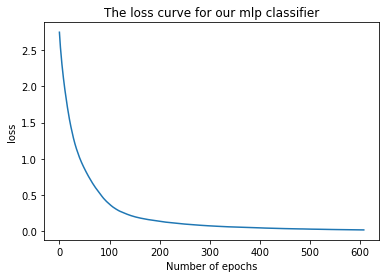

In [21]:
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.title('The loss curve for our mlp classifier')
None

### Make predictions in the *test* dataset

In [22]:
y_pred = mlp.predict(X_test)

### Evaluate the results by looking at the *confusion matrix*

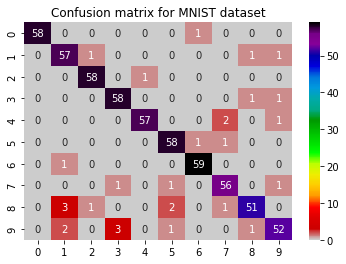

In [23]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
df = pd.DataFrame(confusion)
s = sns.heatmap(df, annot = True, cmap = 'nipy_spectral_r', )
s.set_title('Confusion matrix for MNIST dataset')
None

### Question 4 <span style = 'font-size:80%'>[6 points]</span>

Based on the heatmap above, use Python as a calculator to output the measures below:

(a) the recall of the digit 3

In [24]:
recall3 = 58/60
print(f'The Recall of digit 3 is {recall3*100:.2f}%.')

The Recall of digit 3 is 96.67%.


(b) the precision for the digit 3

In [25]:
precision3 = 58/62
print(f'The Precission of digit 3 is {precision3*100:.2f}%.')

The Precission of digit 3 is 93.55%.


### Question 5 <span style = 'font-size:80%'>[6 points]</span>

In the test dataset, the 50th value is predicted to be a 3, as shown in the code below. What is the true value of the 50th digit?

In [26]:
# get 50th value; reshape is needed to maintain 2D format
X50 = X_test[49,].reshape(1,-1)
mlp.predict(X50)

array([3])

Output true value of the 50th target value

In [38]:
y_pred[49]

3

Recall that for a test input, the neural network calculates probabilities for each possible target value (0 - 9), and then chooses the target value with highest probability. If the prediction is not correct, the correct target value may still have had a high probability. From the code below, what are the two digits with the highest probabilities? 

### (answer here)

In [27]:
p = mlp.predict_proba(X50)
pd.DataFrame(p.round(3))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.641,0.0,0.008,0.0,0.005,0.0,0.346


### Question 6 <span style = 'font-size:80%'>[5 points]</span>

We can use cross validation to find the the optimal number of hidden nodes (and layers). Modify the cell below to create a list called *sizes* that contains the values 10, 30, 64, and 100. Then run the code below which evaluates neural networks with 1 hidden layer of each size in the *sizes* list. Note that this may take 1-2 minutes to run. 

(In addition, other parameters can be optimized such as the number of epochs and the learning rate, which we will not worry about here -- Neural networks are considerably more complex than *kNN*).

In [40]:
sizes = [10,30,64,100]

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create an empty list to store accuracies
acc = []

# for each size, create an mlp estimator and find the mean balanced accuracy using 5-fold cross validation
for size in sizes :

    print('training with size = ', size)

    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, verbose = False, random_state=211)
    
    # create the k = 5 folds
    kfold = KFold(n_splits=5, random_state=99, shuffle = True)
    
    # return an array of scores that contains the balanced accuracy for each fold
    scores = cross_val_score(estimator = mlp, X = digits.data, y = digits.target, cv = kfold, scoring = "balanced_accuracy" )
    print('\tmean balanced accuracy with size = ', size, ': ', scores.mean(), sep = '')

    # add the mean balanced accuracy for the current fold to the list
    acc.append(scores.mean())

training with size =  10
	mean balanced accuracy with size = 10: 0.9402098402079371
training with size =  30
	mean balanced accuracy with size = 30: 0.96540884779484
training with size =  64
	mean balanced accuracy with size = 64: 0.9719901572296544
training with size =  100
	mean balanced accuracy with size = 100: 0.9747449998093456


In [46]:
print("The 'optimal' number of hidden nodes from the sizes we made is 100. This has an accuracy of 97.47")

The 'optimal' number of hidden nodes from the sizes we made is 100. This has an accuracy of 97.47


### Question 7 <span style = 'font-size:80%'>[5 points]</span>

Generate a scatterplot showing the size of hidden layer on the x-axis and the balanced accuracy on the y-axis. Note that after running the code above, the sizes are stored in the list <i>sizes</i> and the balanced accuracies are stored in the list <i>acc</i>. Comment on the optimal size.

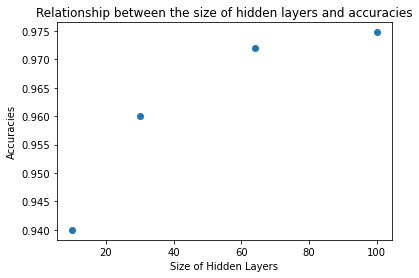

In [4]:
import matplotlib.pyplot as plt

sizes = [10,30,64,100]
accuracy_percentage = [0.94,0.96,0.97199,0.97474]

plt.scatter(sizes,accuracy_percentage)
plt.title('Relationship between the size of hidden layers and accuracies')
plt.xlabel('Size of Hidden Layers')
plt.ylabel('Accuracies')
plt.show()

### Question 8 (optional)

We can improve the neural network slightly by including two layers. Use 5-fold cross-validation to evaluate a multilayer perceptron with 2 hidden layers, that consist of 200 neurons and 10 neurons, respectively. Calculate the mean balanced accuracy. Recall that when specifying the neural network model, that we can set *hidden_layer_sizes* to a list, where the $i^{th}$ element is the number of nodes in the $i^{th}$ hidden layer.